# 필요한 모듈 Import, Random Data 생성

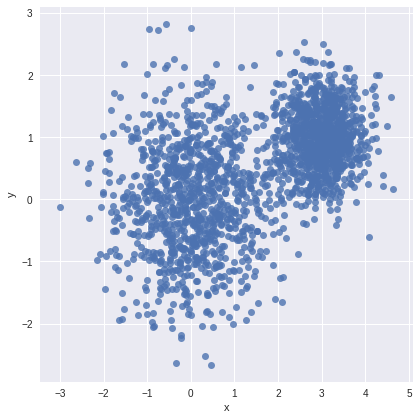

In [19]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

num_points=2000
vectors_set=[]

for i in range(num_points):
  if np.random.random()>0.5:
    vectors_set.append([np.random.normal(0,0.9),
                        np.random.normal(0,0.9)])
  else:
    vectors_set.append([np.random.normal(3.0,0.5),
                        np.random.normal(1,0.5)])

df = pd.DataFrame({"x":[v[0] for v in vectors_set],
                   "y":[v[1] for v in vectors_set]})

sns.lmplot("x", "y", data=df, fit_reg=False, size=6)
plt.show()


#K-means 알고리즘

In [0]:
vectors = tf.constant(vectors_set)
#군집의 개수
k=4

#랜덤하게 k개의 벡터를 추출한 군집의 중심들
centroids = tf.Variable(tf.slice(tf.random_shuffle(vectors),[0,0],[k,-1]))

#연산을 위해 차원 확장
expanded_vectors = tf.expand_dims(vectors, 0)
expanded_centroids = tf.expand_dims(centroids, 1)

#각 벡터를 군집의 중심으로부터 거리가 가장 짧은 군집 선택
assignments = tf. argmin(tf.reduce_sum(tf.square(tf.subtract(
  expanded_vectors, expanded_centroids)), 2), 0)

#군집화된 벡터들의 새로운 중심을 찾아 군집의 중심 이동
means = tf.concat([tf.reduce_mean(tf.gather(vectors,
                                 tf.reshape(tf.where(tf.equal(assignments, c)), [1,-1])),
                                 reduction_indices=[1]) for c in range(k)], 0)

#centroids변수에 means값을 넣음
update_centroids = tf.assign(centroids, means)

init_op = tf.global_variables_initializer()

sess = tf.Session()
sess.run(init_op)

for step in range(100):
  _, centroid_values, assignment_values = sess.run([update_centroids, centroids, assignments])

#그래프로 시각화

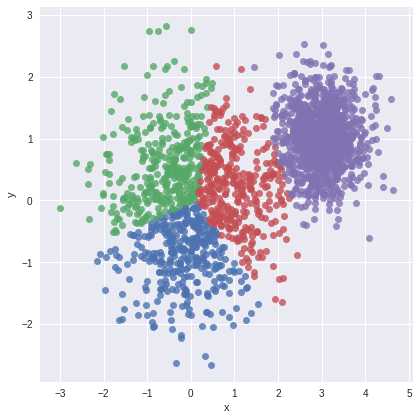

In [21]:
data = {"x":[],
        "y":[],
        "cluster":[]}

for i in range(len(assignment_values)):
  data["x"].append(vectors_set[i][0])
  data["y"].append(vectors_set[i][1])
  data["cluster"].append(assignment_values[i])
  
#hue인수를 통해 각 군집별 색으로 구분
df = pd.DataFrame(data)
sns.lmplot("x","y", data=df, fit_reg=False, size=6, hue="cluster", legend=False)
plt.show()